In [30]:
import numpy as np
import numpy
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
MTLLabel = pd.read_csv('./dataanalysis/label/MTL_Male.dat',header=None)
MTLLabel = MTLLabel.to_numpy().flatten()
MTLLabel

array([-7.7546e-05, -3.7860e-04, -1.1856e-04, ..., -4.3105e-05,
       -5.0434e-05, -4.0889e-05])

In [32]:
# 对各个数组取绝对值后按照降序排序，并且记录数据元素排序前的下标号;
sorted_indices = np.argsort(abs(MTLLabel))[::-1]
sorted_MTLLabel = MTLLabel[sorted_indices]
abs(sorted_MTLLabel)

array([3.0889e-03, 2.5640e-03, 2.4487e-03, ..., 2.6743e-07, 1.9301e-07,
       1.1055e-07])

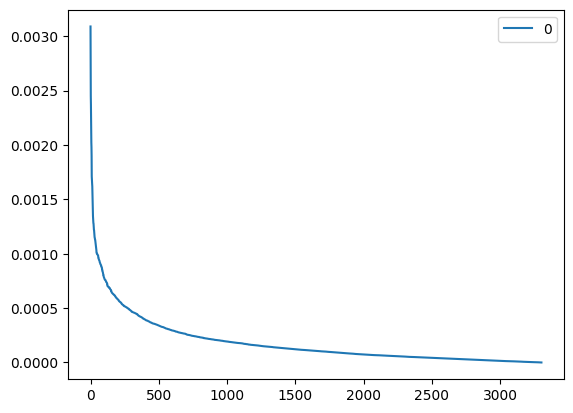

In [33]:
# numpy to pandas
sorted_MTLLabel = abs(pd.DataFrame(sorted_MTLLabel))
sorted_MTLLabel.plot()
plt.show()

In [34]:
# 以文本文件格式读入文件夹\dataanalysis\train\下的MTL_*_train.dat(*表示White或者Male，选择其中一种处理即可)中的数据，并且读入numpy矩阵TrainSample中
TrainSample = pd.read_csv('./dataanalysis/train/MTL_Male_train.dat',header=None)
TrainSample = TrainSample.to_numpy()
print(TrainSample.shape)
TrainSample

(1000, 3304)


array([[10,  3,  1, ...,  7,  6, 31],
       [15,  8,  3, ...,  1, 23, 65],
       [25, 13,  2, ...,  2, 25, 68],
       ...,
       [ 3, 17,  3, ...,  2, 14, 35],
       [10,  3,  1, ...,  1, 93, 23],
       [33, 13,  5, ...,  0, 12, 55]])

In [35]:
TrainSub = TrainSample[:,sorted_indices[:200]]
TrainLabel = np.append(np.zeros(500),np.ones(500))

In [36]:
TestSample = pd.read_csv('./dataanalysis/test/MTL_Male_test.dat',header=None)
TestSample = TestSample.to_numpy()
TestSub = TestSample[:,sorted_indices[:200]]
TestLabel = np.append(np.zeros(400),np.ones(400))

In [46]:
# print(np.vstack(TrainLabel))
print(TrainSub.shape)
print(TrainLabel.shape)
import knnexample.knn_points as knn_points
model = knn_points.KnnClassifier(np.vstack(TrainLabel), np.vstack(TrainSub))
for i in range(10):
    print(model.classify(np.vstack(TestSub[i])))


(1000, 200)
(1000,)


TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
# 引入knn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)

X_train, X_test, y_train, y_test = train_test_split(TrainSub, TrainLabel, test_size=0.0001, random_state=42)

knn.fit(X_train, y_train)
y_pred = knn.predict(TestSub)
accuracy = accuracy_score(TestLabel, y_pred)
accuracy
